In [1]:
%pylab inline
import pickle
import nltk
import wikipedia
import gensim
from sklearn.decomposition import PCA
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use("dark_background")
figsize(8, 8)

In [3]:
id2word = pickle.load(
    open("../../../datasets/skip_id2word.pickle", "rb")
)

word2id = pickle.load(
    open("../../../datasets/skip_word2id.pickle", "rb")
)

data = np.memmap("../../../datasets/skip_np.npy", mode="r+",
                    dtype=np.float, shape=(929605,100))

In [4]:
id2word[555], word2id["teria"], data[555, :]

('teria',
 555,
 memmap([ 4.7276e-01, -9.3556e-02, -5.2666e-01,  4.7626e-02,  1.5097e-02,
         -1.1987e-01, -4.5760e-01,  6.8209e-02,  3.7869e-01, -2.3342e-01,
          4.6554e-01,  2.8782e-01, -3.9181e-02, -1.3762e-01,  6.3291e-04,
         -3.5826e-02, -5.5900e-02,  1.2561e-02, -3.9896e-01, -2.0754e-01,
         -9.5363e-02,  1.9813e-01,  2.2072e-01,  5.8158e-01, -7.5787e-02,
         -3.5612e-02, -1.4523e-01,  2.0074e-01,  4.5505e-01, -9.9724e-01,
          1.5662e-01, -5.9392e-01,  1.4722e-01, -6.5093e-01, -2.6984e-01,
         -4.2141e-01,  3.6630e-01, -1.6090e-01, -1.0237e+00,  2.0643e-01,
          2.0220e-01, -2.0644e-01,  2.9804e-01,  7.3142e-02, -1.4393e-01,
          1.3400e-01,  1.7515e-01,  3.6469e-01, -2.0662e-02,  1.4392e-01,
         -7.4087e-01,  4.5746e-01,  6.9365e-01,  2.2489e-01, -5.7280e-02,
          4.6290e-01, -2.3422e-01,  2.3233e-01,  1.7550e-01,  1.3775e-01,
          7.7443e-02, -1.5886e-01,  3.4872e-01,  5.9543e-01,  2.9011e-01,
          2.4068e-01, 

In [5]:
data.shape

(929605, 100)

## processando os textos

In [6]:
def preprocess(txt, stop_words):
    txt_clean = gensim.utils.simple_preprocess(txt)
    txt_clean = [i for i in txt_clean if i not in stop_words]
    return set(txt_clean)

In [7]:
wikipedia.set_lang("pt")

txt1 = wikipedia.page("Lutefisk").content
txt2 = wikipedia.page("Erhu").content

In [8]:
stop_words = nltk.corpus.stopwords.words("portuguese")

txt1 = preprocess(txt1, stop_words)
txt2 = preprocess(txt2, stop_words)

In [15]:
comum = txt1.intersection(txt2)
txt1_alone = txt1.difference(txt2)
txt2_alone = txt2.difference(txt1)

len(comum), len(txt1_alone), len(txt2_alone)

(79, 454, 414)

## visualização

In [17]:
id_comum = np.array([word2id[i] for i in comum if i in id2word])
id_text1 = np.array([word2id[i] for i in txt1_alone if i in id2word])
id_text2 = np.array([word2id[i] for i in txt2_alone if i in id2word])

In [18]:
f"text1 shape: {id_text1.shape} | text2 shape: {id_text2.shape} | comum shape: {id_comum.shape}"

'text1 shape: (446,) | text2 shape: (407,) | comum shape: (79,)'

In [19]:
pca = PCA(n_components=2)

In [20]:
X = pca.fit_transform(np.concatenate((data[id_text1, :], data[id_text2, :], data[id_comum, :]), axis=0))

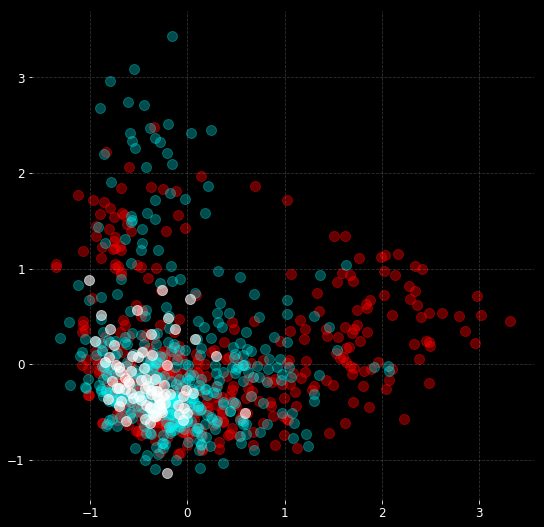

In [28]:
fig, ax = subplots(figsize=(9, 9))

ax.scatter(X[:446, 0], X[:446, 1], c="red", alpha=0.4, s=100)
ax.scatter(X[446:-79, 0], X[446:-79, 1], c="cyan", alpha=0.3, s=100)
ax.scatter(X[-79:, 0], X[-79:, 1], c="white", alpha=0.6, s=100)

# for i,j  in enumerate(np.concatenate((id_text1, id_text2), axis=0)):
#     ax.annotate(id2word[j], (X[i, 0], X[i, 1]))

savefig("../images/classificacao_1_scatter_voc.png", transparent=True)

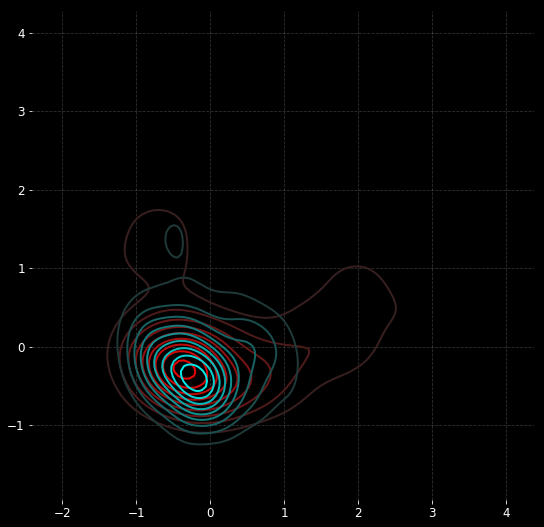

In [29]:
fig, ax = subplots(figsize=(9, 9))

sns.kdeplot(X[:446, 0], X[:446, 1], color="red", ax=ax)
sns.kdeplot(X[446:-79, 0], X[446:-79, 1], color="cyan", ax=ax)

savefig("../images/classificacao_1_kde_voc.png", transparent=True)